1. Trajectories

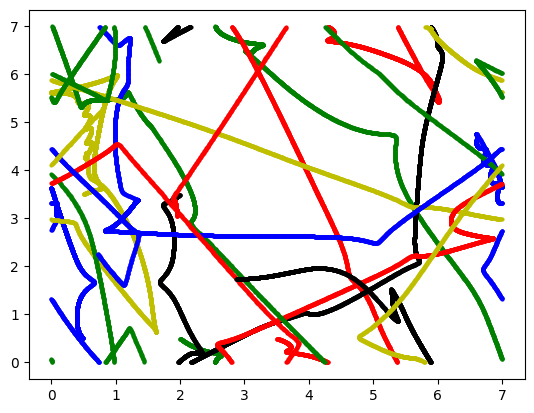

x:
[[0.49815033 0.49632972 0.49453772 ... 0.73456354 0.73057199 0.72661081]
 [2.00220942 2.00441893 2.00662885 ... 1.66532296 1.6703594  1.67536213]
 [3.50347886 3.50692849 3.51034904 ... 1.94777706 1.94755874 1.94732289]
 [0.50261825 0.50526579 0.50794319 ... 0.81150712 0.81883885 0.82620491]
 [1.99765348 1.99527773 1.99287219 ... 2.8842666  2.88021862 2.87615718]]
y:
[[0.50235324 0.50470682 0.50706066 ... 2.24295217 2.25127877 2.25962354]
 [0.49793036 0.49586114 0.49379246 ... 6.32542003 6.30830165 6.29114352]
 [0.49851207 0.49702427 0.49553658 ... 3.05804961 3.05408543 3.05008817]
 [3.50190138 3.50380231 3.5057027  ... 5.29704308 5.30748722 5.31797062]
 [3.49713559 3.49427073 3.49140552 ... 1.74406449 1.74420895 1.7443688 ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


L=7
def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)



def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                  deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot)

def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(x_arr,y_arr,L)[0],accel(x_arr,y_arr,L)[1] 
        rx = (rx + vx*h + 0.5*ax*h**2) % L
        ry = (ry + vy*h + 0.5*ay*h**2) % L 

        ax_new, ay_new = accel(x_arr,y_arr,L)[0],accel(x_arr,y_arr,L)[1] 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new) 
        
    return rx,vx,ry,vy

Number=5
x_arr,y_arr,vx_arr,vy_arr=init(Number,L,0.7)

times=5000
x_traj=np.zeros((times,Number))
y_traj=np.zeros((times,Number))
for i in range(times):
    x_arr,vx_arr,y_arr,vy_arr=verle(0.001,5,x_arr,y_arr,vx_arr,vy_arr,L)
    x_traj[i]=x_arr
    y_traj[i]=y_arr

for i in range(times):
    for t in range(Number):
        if t==0:
            plt.plot(x_traj[i][t],y_traj[i][t],'bo',markersize=2)
        if t==1:
            plt.plot(x_traj[i][t],y_traj[i][t],'go',markersize=2)
        if t==2:
            plt.plot(x_traj[i][t],y_traj[i][t],'ro',markersize=2)
        if t==3:
            plt.plot(x_traj[i][t],y_traj[i][t],'yo',markersize=2)
        if t==4:
            plt.plot(x_traj[i][t],y_traj[i][t],'ko',markersize=2)
        if t==5:
            plt.plot(x_traj[i][t],y_traj[i][t],'co',markersize=2)
        if t==6:
            plt.plot(x_traj[i][t],y_traj[i][t],'mo',markersize=2)
        if t==7:
            plt.plot(x_traj[i][t],y_traj[i][t],'o',markersize=2,color='brown')
        if t==8:
            plt.plot(x_traj[i][t],y_traj[i][t],'o',markersize=2,color='gray')
        if t==9:
            plt.plot(x_traj[i][t],y_traj[i][t],'o',markersize=2,color='orange')
plt.show()

x_traj=np.transpose(x_traj)
y_traj=np.transpose(y_traj)


print("x:")
print(x_traj)
print("y:")
print(y_traj)

2. Number of Particles in the Right Half

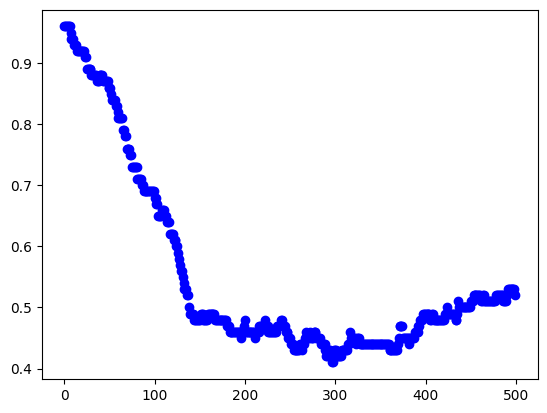

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


L=30
def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)



def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot)

def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(rx,ry,L) 
        rx = (rx + vx*h + 0.5*ax*h**2) % L 
        ry = (ry + vy*h + 0.5*ay*h**2) % L 

        ax_new, ay_new = accel(rx,ry,L) 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new) 
        
    return rx,vx,ry,vy

Number=100
x_arr,y_arr,vx_arr,vy_arr=init(Number,L,2.)
times=500
x_traj=np.zeros((times,Number))
y_traj=np.zeros((times,Number))
count_arr=np.zeros(times)
for i in range(times):
    x_arr,vx_arr,y_arr,vy_arr=verle(0.005,10,x_arr,y_arr,vx_arr,vy_arr,L)
    x_traj[i]=x_arr
    y_traj[i]=y_arr
    count=0
    for n in range(Number):
        if x_traj[i][n]<L/2:
            count+=1
    count_arr[i]=count
for i in range(times):
    plt.plot(i,count_arr[i]/Number,'bo')
plt.show()

3. Energies

  0%|          | 0/500 [00:00<?, ?it/s]

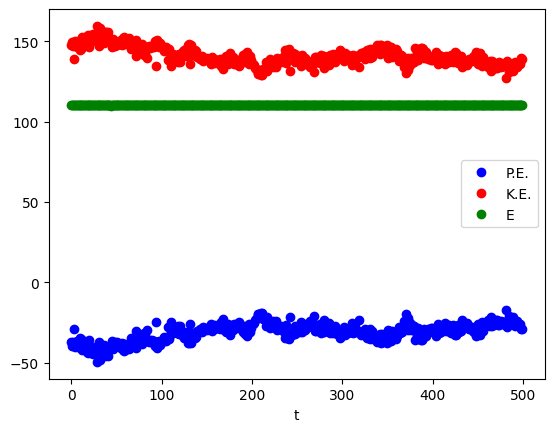

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


L=30


def potential(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]*r_arr[i][j]*r_arr[i][j]
            rpp=rp*rp
            tmp=4*(1/rpp-1/rp)
            fx_arr[i][j]=tmp
            fx_arr[j][i]=fx_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    return(fx_tot)

def kinetic(vx_arr,vy_arr):
    n=len(vx_arr)
    k_arr=np.zeros(n)
    for i in range(n):
        k_arr[i]=0.5*(vx_arr[i]**2+vy_arr[i]**2)
    return k_arr


def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    #np.random.seed(45)
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)

def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                  deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot)


def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(rx,ry,L) 
        rx = (rx + vx*h + 0.5*ax*h**2) % L 
        ry = (ry + vy*h + 0.5*ay*h**2) % L 
        
        ax_new, ay_new = accel(rx,ry,L) 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new) 
        
    return rx,vx,ry,vy

Number=100
x_arr,y_arr,vx_arr,vy_arr=init(Number,L,2.)
vx_arr-=np.mean(vx_arr)
vy_arr-=np.mean(vy_arr)
times=500
PEnergy_arr=np.zeros(times)
KEnergy_arr=np.zeros(times)
for i in tqdm(range(times)):
    x_arr,vx_arr,y_arr,vy_arr=verle(0.005,10,x_arr,y_arr,vx_arr,vy_arr,L)
    PEnergy_arr[i]=np.sum(potential(x_arr,y_arr,L))/2
    KEnergy_arr[i]=np.sum(kinetic(vx_arr,vy_arr))

for i in range(times):
  if i==0:
    plt.plot(i,PEnergy_arr[i],'bo',label='P.E.')
  else:
    plt.plot(i,PEnergy_arr[i],'bo')
for i in range(times):
  if i==0:
    plt.plot(i,KEnergy_arr[i],'ro',label='K.E.')
  else:
    plt.plot(i,KEnergy_arr[i],'ro')
for i in range(times):
  if i==0:
    plt.plot(i,KEnergy_arr[i]+PEnergy_arr[i],'go',label='E')
  else:
    plt.plot(i,KEnergy_arr[i]+PEnergy_arr[i],'go')
plt.legend()
plt.xlabel('t')
plt.show()

In [ ]:
4. Velocity Correlation

  0%|          | 0/500 [00:00<?, ?it/s]

[[-0.88167078 -0.84942154 -0.83113428 ...  1.0431722   0.99121832
   0.93532151]
 [ 1.72592371  1.78831032  1.87542554 ... -0.07654327 -0.07559681
  -0.07481032]
 [ 0.39763594  0.37638802  0.33993241 ... -1.0235404  -0.98273312
  -0.95447199]
 ...
 [-1.5421086  -1.56621442 -1.60987746 ... -0.88068545 -0.85121607
  -0.81522999]
 [-1.58685849 -1.65365381 -1.71415301 ...  1.15762872  1.20908149
   1.26455128]
 [-1.75155199 -1.75126214 -1.75093057 ... -1.93958796 -1.87763191
  -1.78713304]]
[[-1.59171784 -1.58704857 -1.58295937 ...  0.60723162  0.6306199
   0.65547624]
 [ 1.21187614  1.19645392  1.16953858 ... -1.2503016  -1.14382329
  -1.06770754]
 [-1.35377204 -1.32875876 -1.2853999  ...  0.77777529  0.709941
   0.66579049]
 ...
 [ 1.44406685  1.42946541  1.40638872 ...  0.20047597  0.31951315
   0.43841896]
 [-1.38032682 -1.37210042 -1.35934832 ...  0.2380777   0.21304347
   0.18673394]
 [-1.47685973 -1.47783365 -1.47886033 ...  0.77674626  0.82259382
   0.87951168]]


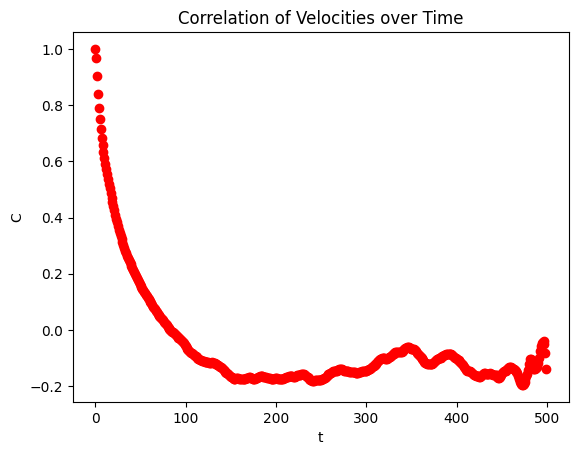

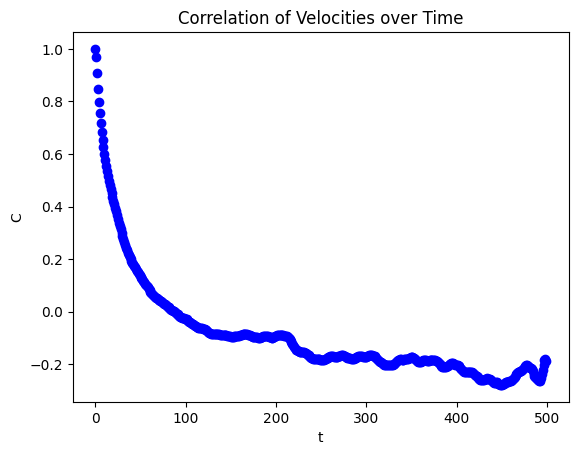

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

L=30

def potential(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=(x_arr[i]-x_arr[j])
            deltay=(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=4*(1/rpp-1/rp)
            fx_arr[i][j]=tmp
            fx_arr[j][i]=fx_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    return(fx_tot)

def kinetic(vx_arr,vy_arr):
    n=len(vx_arr)
    k_arr=np.zeros(n)
    for i in range(n):
        k_arr[i]=0.5*(vx_arr[i]**2+vy_arr[i]**2)
    return k_arr


def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    #np.random.seed(45)
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)

def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot)

def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(rx,ry,L) 
        rx = (rx + vx*h + 0.5*ax*h**2) % L 
        ry = (ry + vy*h + 0.5*ay*h**2) % L 
        
        ax_new, ay_new = accel(rx,ry,L) 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new) 
        
    return rx,vx,ry,vy

def c(j,arr_x):
    sum1=0
    counter=0
    for i in range(len(arr_x)-j):
      
        sum1+=arr_x[i]*arr_x[(i+j)%len(arr_x)]
    mean1=sum1/(len(arr_x)-j)
    mean2=np.mean(arr_x)**2
    std=np.std(arr_x)
    return (mean1-mean2)/(std**2)

Number=100
x_arr,y_arr,vx_arr,vy_arr=init(Number,L,2.)
vx_arr-=np.mean(vx_arr)
vy_arr-=np.mean(vy_arr)
v_arr=np.sqrt(np.square(vx_arr)+np.square(vy_arr))
vxi_arr=vx_arr.copy()
vyi_arr=vy_arr.copy()
vi_arr=v_arr.copy()

times=500
corx=np.zeros(times)
cory=np.zeros(times)
cor=np.zeros(times)
x_traj=np.zeros((times,Number))
y_traj=np.zeros((times,Number))

for i in tqdm(range(times)):
    x_arr,vx_arr,y_arr,vy_arr=verle(0.005,10,x_arr,y_arr,vx_arr,vy_arr,L)
    x_traj[i]=vx_arr
    y_traj[i]=vy_arr

x_traj=np.transpose(x_traj)
y_traj=np.transpose(y_traj)
print(x_traj)
print(y_traj)
cor_arrx=np.array([[c(t,x_traj[i]) for i in range(Number)] for t in range(times)])
cor_sumx=np.array([np.mean(cor_arrx[t]) for t in range(times)])
cor_arry=np.array([[c(t,y_traj[i]) for i in range(Number)] for t in range(times)])
cor_sumy=np.array([np.mean(cor_arry[t]) for t in range(times)])

for i in range(times):
  plt.plot(i,cor_sumx[i],'ro')
plt.xlabel('t')
plt.ylabel('C')
plt.title('Correlation of Velocities over Time')
plt.show()


for i in range(times):
  plt.plot(i,cor_sumy[i],'bo')
plt.xlabel('t')
plt.ylabel('C')
plt.title('Correlation of Velocities over Time')
plt.show()

5. Temperature and Pressure

  0%|          | 0/500 [00:00<?, ?it/s]

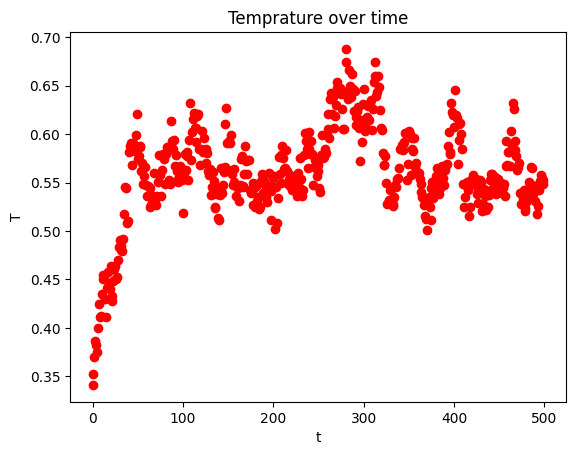

Masking values outside of 0.4956370357061309 and 0.6346001171053275
Temprature is 0.5606109635746587


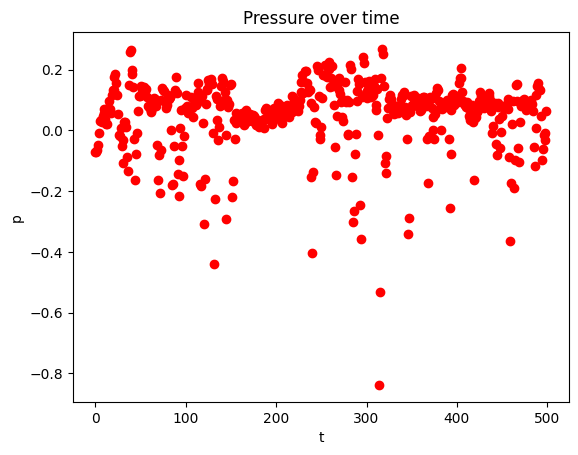

Masking values outside of -0.1819363811612108 and 0.28757053294177354
Pressure is 0.0692880634939153


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


L=30

def reject_outliers(data):
    stdev = np.std(data)
    mean = np.mean(data)
    maskMin = mean - stdev * 2
    maskMax = mean + stdev * 2
    mask = np.ma.masked_outside(data, maskMin, maskMax)
    print('Masking values outside of {} and {}'.format(maskMin, maskMax))
    return mask

def potential(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=(x_arr[i]-x_arr[j])
            deltay=(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=4*(1/rpp-1/rp)
            fx_arr[i][j]=tmp
            fx_arr[j][i]=fx_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    return(fx_tot)

def kinetic(vx_arr,vy_arr):
    n=len(vx_arr)
    k_arr=np.zeros(n)
    for i in range(n):
        k_arr[i]=0.5*(vx_arr[i]**2+vy_arr[i]**2)
    return k_arr


def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    #np.random.seed(45)
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)

def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                  deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot,fx_arr,fy_arr)

def virial(x_arr,y_arr,L):
  sumx=0
  sumy=0
  fx_arr=accel(x_arr,y_arr,L)[2]
  fy_arr=accel(x_arr,y_arr,L)[3]
  for i in range(len(x_arr)):
    for j in range(i,len(x_arr)):
      sumx+=(x_arr[i]-x_arr[j])*fx_arr[i][j]
      sumy+=(y_arr[i]-y_arr[j])*fy_arr[i][j]
  return (sumx+sumy)/(2)

  
def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(rx,ry,L)[0],accel(rx,ry,L)[1] 
        rx = (rx + vx*h + 0.5*ax*h**2) % L
        ry = (ry + vy*h + 0.5*ay*h**2) % L
        
        ax_new, ay_new = accel(rx,ry,L)[0],accel(rx,ry,L)[1] 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new)         
    return rx,vx,ry,vy
        

Number=100
x_arr,y_arr,vx_arr,vy_arr=init(Number,L,1.)
vx_arr-=np.mean(vx_arr)
vy_arr-=np.mean(vy_arr)
times=500
T_arr=np.zeros(times)
p_arr=np.zeros(times)
for i in tqdm(range(times)):
    x_arr,vx_arr,y_arr,vy_arr=verle(0.005,10,x_arr,y_arr,vx_arr,vy_arr,L)
    T_arr[i]=np.sum(kinetic(vx_arr,vy_arr))/Number
    p_arr[i]=(Number*T_arr[i]+virial(x_arr,y_arr,L))/(L*L)

for i in range(times):
  if i==0:
    plt.plot(i,T_arr[i],'ro')
  else:
    plt.plot(i,T_arr[i],'ro')
plt.xlabel('t')
plt.ylabel('T')
plt.title('Temprature over time')
plt.show()
Temp=np.mean(reject_outliers(T_arr[-200:]))
print('Temprature is',Temp)


for i in range(times):
  if i==0:
    plt.plot(i,p_arr[i],'ro')
  else:
    plt.plot(i,p_arr[i],'ro')
plt.xlabel('t')
plt.ylabel('p')
plt.title('Pressure over time')
plt.show()
Pre=np.mean(reject_outliers(p_arr[-200:]))
print('Pressure is',Pre)

6. Van del Walls Coefficients

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

[0.06919744 0.09139672 0.0880162  0.10555096 0.086592   0.13233505
 0.128752   0.14001565 0.12833968 0.15636848]
[0.51736664 0.63428758 0.65029795 0.66906879 0.74581493 0.83666324
 0.87004121 0.96290407 1.08095605 1.21253809]
[0.11804329 0.01609773]


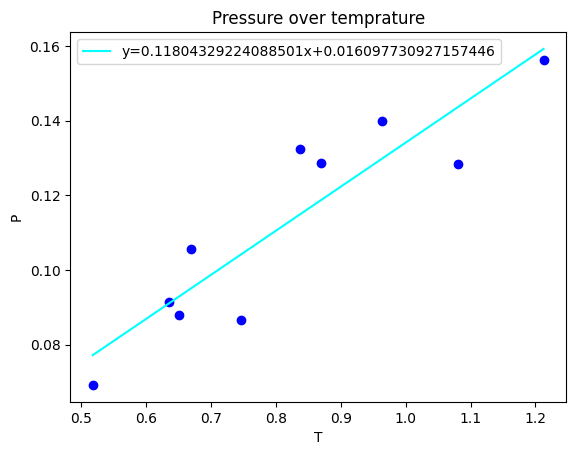

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


L=30


def reject_outliers(data):
    stdev = np.std(data)
    mean = np.mean(data)
    maskMin = mean - stdev
    maskMax = mean + stdev
    mask = np.ma.masked_outside(data, maskMin, maskMax)
    return mask

def potential(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=(x_arr[i]-x_arr[j])
            deltay=(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=4*(1/rpp-1/rp)
            fx_arr[i][j]=tmp
            fx_arr[j][i]=fx_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    return(fx_tot)

def kinetic(vx_arr,vy_arr):
    n=len(vx_arr)
    k_arr=np.zeros(n)
    for i in range(n):
        k_arr[i]=0.5*(vx_arr[i]**2+vy_arr[i]**2)
    return k_arr


def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    #np.random.seed(45)
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)

def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                  deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot,fx_arr,fy_arr)

def virial(x_arr,y_arr,L):
  sumx=0
  sumy=0
  fx_arr=accel(x_arr,y_arr,L)[2]
  fy_arr=accel(x_arr,y_arr,L)[3]
  for i in range(len(x_arr)):
    for j in range(i,len(x_arr)):
      sumx+=(x_arr[i]-x_arr[j])*fx_arr[i][j]
      sumy+=(y_arr[i]-y_arr[j])*fy_arr[i][j]
  return (sumx+sumy)/(2)

  
def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(rx,ry,L)[0],accel(rx,ry,L)[1] 
        rx = (rx + vx*h + 0.5*ax*h**2) % L
        ry = (ry + vy*h + 0.5*ay*h**2) % L
        
        ax_new, ay_new = accel(rx,ry,L)[0],accel(rx,ry,L)[1] 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new)         
    return rx,vx,ry,vy

Number=100
vi=np.arange(1,2,0.1)
repeat=len(vi)
p=np.zeros(repeat)
T=np.zeros(repeat)
n=0
for v in tqdm(vi):
  x_arr,y_arr,vx_arr,vy_arr=init(Number,L,v)
  vx_arr-=np.mean(vx_arr)
  vy_arr-=np.mean(vy_arr)
  times=500
  T_arr=np.zeros(times)
  p_arr=np.zeros(times)
  for i in tqdm(range(times)):
      x_arr,vx_arr,y_arr,vy_arr=verle(0.005,10,x_arr,y_arr,vx_arr,vy_arr,L)
      T_arr[i]=np.sum(kinetic(vx_arr,vy_arr))/Number
      p_arr[i]=(Number*T_arr[i]+virial(x_arr,y_arr,L))/(L*L)
  p[n]=np.mean(reject_outliers(p_arr[-200:]))
  T[n]=np.mean(reject_outliers(T_arr[-200:]))
  n+=1
print(p)
print(T)
plt.plot(T,p,'bo')

coeffs = np.polyfit(T, p, deg=1)
print(coeffs)
line = np.poly1d(coeffs)
plt.plot(T, line(T), color='cyan',label='y=%sx+%s'%(coeffs[0],coeffs[1]))
plt.legend()
plt.xlabel('T')
plt.ylabel('P')
plt.title('Pressure over temprature')
plt.show()


7. Phase Transition

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

[  81.59063335   39.71901525   12.47424758   -8.41505421  -28.02242374
  -45.59884387  -62.86948393  -80.75743471  -96.9440121  -112.1321617 ]
[1.12641033 0.78417082 0.61869997 0.54814469 0.47791309 0.4639242
 0.47672545 0.42768245 0.38823184 0.41314344]


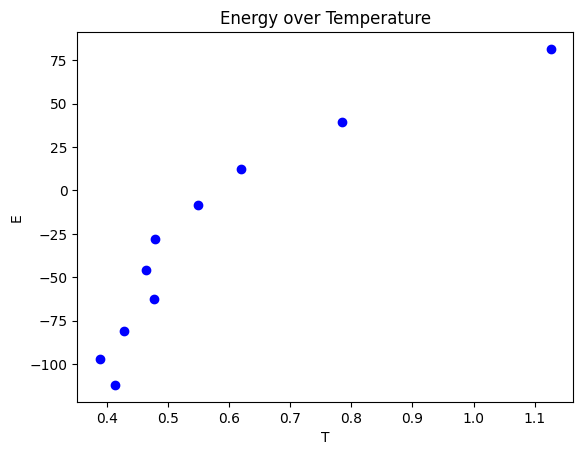

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def reject_outliers(data):
    stdev = np.std(data)
    mean = np.mean(data)
    maskMin = mean - stdev 
    maskMax = mean + stdev 
    mask = np.ma.masked_outside(data, maskMin, maskMax)
    return mask

L=30


def potential(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                    deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]*r_arr[i][j]*r_arr[i][j]
            rpp=rp*rp
            tmp=4*(1/rpp-1/rp)
            fx_arr[i][j]=tmp
            fx_arr[j][i]=fx_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    return(fx_tot)

def kinetic(vx_arr,vy_arr):
    n=len(vx_arr)
    k_arr=np.zeros(n)
    for i in range(n):
        k_arr[i]=0.5*(vx_arr[i]**2+vy_arr[i]**2)
    return k_arr


def init(n,L,v_max):
    x_pos = np.linspace(0.5, L/2, int(n**(1/2)+1))
    y_pos = np.linspace(0.5, L-0.5, int(n**(1/2)+1))
    x_arr=np.zeros(n)
    y_arr=np.zeros(n)
    num=0
    for j in range(len(y_pos)):
        for i in range(len(x_pos)):
            if num<n:
                x_arr[num]=x_pos[i]
                y_arr[num]=y_pos[j]
                num+=1
    #np.random.seed(45)
    vx_arr=np.random.uniform(-v_max, v_max, n)
    vy_arr=np.random.uniform(-v_max, v_max, n)
    return(x_arr,y_arr,vx_arr,vy_arr)

def accel(x_arr,y_arr,L):
    n=len(x_arr)
    fx_arr=np.zeros((n,n))
    fy_arr=np.zeros((n,n))
    rc=L/2
    r_arr=np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            deltax=-(x_arr[i]-x_arr[j])
            deltay=-(y_arr[i]-y_arr[j])
            if abs(deltax)>rc:
                deltax-=L*np.sign(deltax)
                if abs(deltay)>rc:
                  deltay-=L*np.sign(deltay)
            elif abs(deltay)>rc:  
                deltay-=L*np.sign(deltay)
            r_arr[i][j]=(deltax)**2+(deltay)**2
            rp=r_arr[i][j]**3
            rpp=rp**2
            tmp=-4*(12/rpp-6/rp)/r_arr[i][j]
            fx_arr[i][j]=tmp*deltax
            fy_arr[i][j]=tmp*deltay
            fx_arr[j][i]=-fx_arr[i][j]
            fy_arr[j][i]=-fy_arr[i][j]
    fx_tot=np.sum(fx_arr, axis=1)
    fy_tot=np.sum(fy_arr, axis=1)
    return(fx_tot,fy_tot,fx_arr,fy_arr)

def virial(x_arr,y_arr,L):
  sumx=0
  sumy=0
  fx_arr=accel(x_arr,y_arr,L)[2]
  fy_arr=accel(x_arr,y_arr,L)[3]
  for i in range(len(x_arr)):
    for j in range(i,len(x_arr)):
      sumx+=(x_arr[j]-x_arr[i])*fx_arr[i][j]
      sumy+=(y_arr[j]-y_arr[i])*fy_arr[i][j]
  return (sumx+sumy)/(2)

  
def verle(h,N,x_0,y_0,vx_0,vy_0,L):
    rx = x_0
    vx = vx_0
    ry = y_0
    vy = vy_0
    for n in range(N):
        ax,ay = accel(rx,ry,L)[0],accel(rx,ry,L)[1] 
        rx = (rx + vx*h + 0.5*ax*h**2) % L 
        ry = (ry + vy*h + 0.5*ay*h**2) % L 

        ax_new, ay_new = accel(rx,ry,L)[0],accel(rx,ry,L)[1] 
        vx += 0.5*h*(ax + ax_new) 
        vy += 0.5*h*(ay + ay_new) 
    return rx,vx,ry,vy

Number=100
repeat=10
E=np.zeros(repeat)
T=np.zeros(repeat)
n=0
scale=0.8
times=500
x_arr,y_arr,vx_arr,vy_arr=init(Number,L,2.)
vx_arr-=np.mean(vx_arr)
vy_arr-=np.mean(vy_arr)
for v in tqdm(range(repeat)):
  T_arr=np.zeros(times)
  Energy_arr=np.zeros(times)
  for i in tqdm(range(times)):
      x_arr,vx_arr,y_arr,vy_arr=verle(0.005,10,x_arr,y_arr,vx_arr,vy_arr,L)
      T_arr[i]=np.sum(kinetic(vx_arr,vy_arr))/Number
      Energy_arr[i]=np.sum(potential(x_arr,y_arr,L))/2+np.sum(kinetic(vx_arr,vy_arr))
  E[n]=np.mean(reject_outliers(Energy_arr[-200:]))
  T[n]=np.mean(reject_outliers(T_arr[-200:]))
  n+=1
  vx_arr*=scale
  vy_arr*=scale

print(E)
print(T)
plt.plot(T,E,'bo')
plt.title('Energy over Temperature')
plt.xlabel('T')
plt.ylabel('E')
plt.show()
